In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime

budget = pd.read_csv('budget_and_gross.csv')
print([budget.columns[14]])
oscar = pd.read_csv('oscar_noms_and_winners.csv')

budget[budget.columns[14]] = pd.to_datetime(budget[budget.columns[14]], errors='coerce', format="%Y-%m-%d")
date_objects = budget[budget.columns[14]].dropna().tolist()

print(date_objects[0])

['release_date']
1995-10-30 00:00:00


/var/folders/rv/q52q8kmj0s558xpyhlshtzw00000gn/T/ipykernel_45531/560548135.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  budget = pd.read_csv('budget_and_gross.csv')


In [38]:
budgetYears = budget[budget['release_date'].dt.year>1999]
oscarYears = oscar[oscar['year_ceremony']>1999]
oscarPicture = oscarYears[oscarYears['category']=='BEST PICTURE']

In [41]:
budgetPicture = pd.merge(budgetYears, oscarPicture, how='inner', left_on='title', right_on='film')

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'year_film', 'year_ceremony', 'ceremony',
       'category', 'name', 'film', 'winner'],
      dtype='object')


In [48]:
columnsDrop = ['adult', 'belongs_to_collection', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'runtime',
       'spoken_languages', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'ceremony', 'name']

# Clean and prepare the film budgets and revenues data
budgetYears_cleaned = budgetPicture.drop(columns=columnsDrop)
print(budgetYears_cleaned.columns)

for col in ['budget', 'revenue']:
    budgetYears_cleaned[col] = pd.to_numeric(budgetYears_cleaned[col].replace('[\$,]', '', regex=True), errors='coerce')

# Export the final cleaned and merged dataset
final_dataset_path = 'final_oscar_nominees_dataset_2000_to_2023.csv'
budgetYears_cleaned.to_csv(final_dataset_path, index=False)

print(f"The final dataset has been saved to {final_dataset_path}")


Index(['budget', 'original_title', 'release_date', 'revenue', 'title',
       'year_film', 'year_ceremony', 'category', 'film', 'winner'],
      dtype='object')
The final dataset has been saved to final_oscar_nominees_dataset_2000_to_2023.csv


In [49]:
file = pd.read_csv("final_oscar_nominees_dataset_2000_to_2023.csv")

display(file)

,budget,original_title,release_date,revenue,title,year_film,year_ceremony,category,film,winner
0,52000000,Erin Brockovich,2000-03-17,256271286.0,Erin Brockovich,2000,2001,BEST PICTURE,Erin Brockovich,False
1,103000000,Gladiator,2000-05-01,457640427.0,Gladiator,2000,2001,BEST PICTURE,Gladiator,True
2,17000000,卧虎藏龙,2000-10-01,213525736.0,"Crouching Tiger, Hidden Dragon",2000,2001,BEST PICTURE,"Crouching Tiger, Hidden Dragon",False
3,25000000,Chocolat,2000-12-14,152500343.0,Chocolat,2000,2001,BEST PICTURE,Chocolat,False
4,48000000,Traffic,2000-12-27,207515725.0,Traffic,2000,2001,BEST PICTURE,Traffic,False
...,...,...,...,...,...,...,...,...,...,...
128,18500000,Chocolat,2016-02-03,0.0,Chocolat,2000,2001,BEST PICTURE,Chocolat,False
129,4696772,Call Me by Your Name,2017-10-27,0.0,Call Me by Your Name,2017,2018,BEST PICTURE,Call Me by Your Name,False
130,0,サイドウェイズ,2009-10-31,0.0,Sideways,2004,2005,BEST PICTURE,Sideways,False
131,100000000,Dunkirk,2017-07-19,519876949.0,Dunkirk,2017,2018,BEST PICTURE,Dunkirk,False


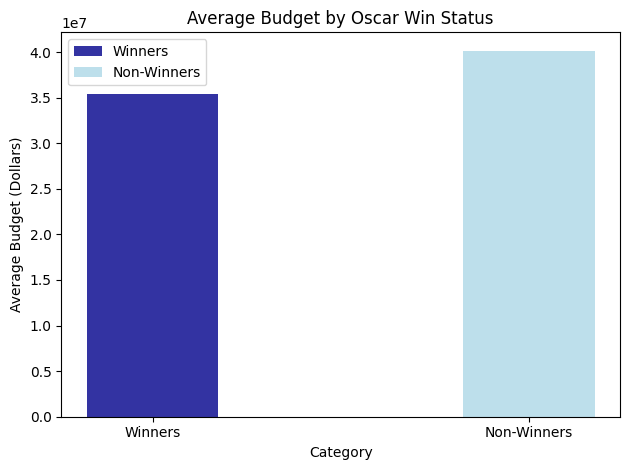

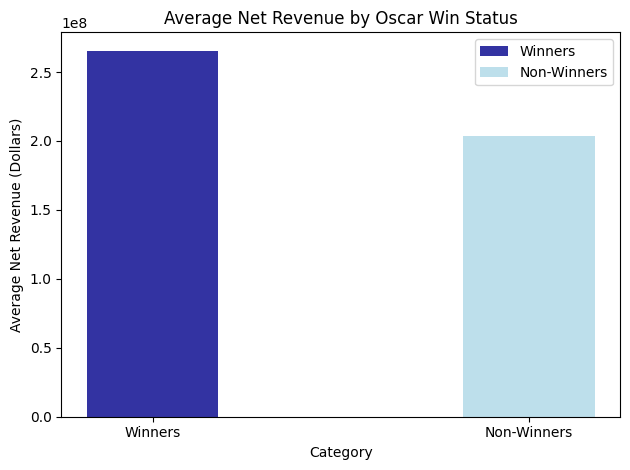

In [59]:
# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average budget and net revenue for winners and non-winners
average_budget_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['budget'].mean()
average_net_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['revenue'].mean()

average_budget_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['budget'].mean()
average_net_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['revenue'].mean()

# Data to plot
categories = ['Winners', 'Non-Winners']
budget_data = [average_budget_winners, average_budget_non_winners]
revenue_data = [average_net_revenue_winners, average_net_revenue_non_winners]

# Colors for the bars
colors_budget = ['darkblue', 'lightblue']
colors_revenue = ['darkblue', 'lightblue']

# Plotting Average Budget
fig, ax1 = plt.subplots()
index = np.arange(len(categories))
bar_width = 0.35
opacity = 0.8

rects1 = ax1.bar(index, budget_data, bar_width, alpha=opacity, color=colors_budget, label=categories)

ax1.set_xlabel('Category')
ax1.set_ylabel('Average Budget (Dollars)')
ax1.set_title('Average Budget by Oscar Win Status')
ax1.set_xticks(index)
ax1.set_xticklabels(categories)
ax1.legend()

plt.tight_layout()
plt.show()

# Plotting Average Net Revenue
fig, ax2 = plt.subplots()
rects2 = ax2.bar(index, revenue_data, bar_width, alpha=opacity, color=colors_revenue, label=categories)

ax2.set_xlabel('Category')
ax2.set_ylabel('Average Net Revenue (Dollars)')
ax2.set_title('Average Net Revenue by Oscar Win Status')
ax2.set_xticks(index)
ax2.set_xticklabels(categories)
ax2.legend()

plt.tight_layout()
plt.show()


In [62]:
# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average budget for winners and non-winners
average_budget_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['budget'].mean()
average_budget_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['budget'].mean()

# Calculate average net revenue for winners and non-winners
average_net_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['revenue'].mean()
average_net_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['revenue'].mean()

# Print the results
print(f"Average Budget for Winners: ${average_budget_winners:,.2f}")
print(f"Average Budget for Non-Winners: ${average_budget_non_winners:,.2f}\n")
print(f"Average Net Revenue for Winners: ${average_net_revenue_winners:,.2f}")
print(f"Average Net Revenue for Non-Winners: ${average_net_revenue_non_winners:,.2f}\n")

Average Budget for Winners: $35,411,764.71
Average Budget for Non-Winners: $40,161,729.12

Average Net Revenue for Winners: $265,514,222.18
Average Net Revenue for Non-Winners: $203,663,146.16



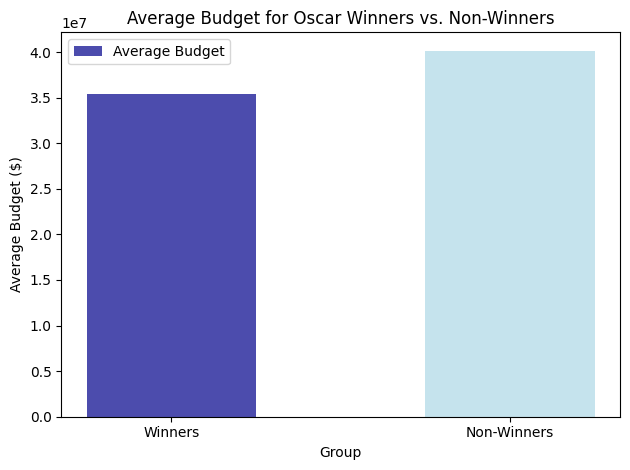

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average budget for winners and non-winners
average_budget_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['budget'].mean()
average_budget_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['budget'].mean()

# Data to plot
categories = ['Winners', 'Non-Winners']
average_budgets = [average_budget_winners, average_budget_non_winners]
colors = ['darkblue', 'lightblue']  # Assigning different colors for winners and non-winners

# Create plot
fig, ax = plt.subplots()
bar_positions = np.arange(len(categories))
bar_width = 0.5
opacity = 0.7

bars = ax.bar(bar_positions, average_budgets, bar_width,
              alpha=opacity, color=colors, label='Average Budget')

ax.set_xlabel('Group')
ax.set_ylabel('Average Budget ($)')
ax.set_title('Average Budget for Oscar Winners vs. Non-Winners')
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


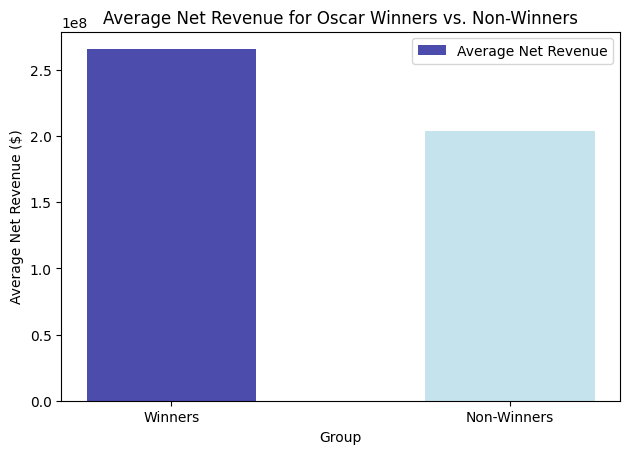

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average net revenue for winners and non-winners
average_net_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['revenue'].mean()
average_net_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['revenue'].mean()
colors = ['darkblue', 'lightblue']  # Assigning different colors for winners and non-winners

# Data to plot
categories = ['Winners', 'Non-Winners']
average_net_revenues = [average_net_revenue_winners, average_net_revenue_non_winners]

# Create plot
fig, ax = plt.subplots()
bar_positions = np.arange(len(categories))
bar_width = 0.5
opacity = 0.7

bars = ax.bar(bar_positions, average_net_revenues, bar_width,
              alpha=opacity, color=colors, label='Average Net Revenue')

ax.set_xlabel('Group')
ax.set_ylabel('Average Net Revenue ($)')
ax.set_title('Average Net Revenue for Oscar Winners vs. Non-Winners')
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


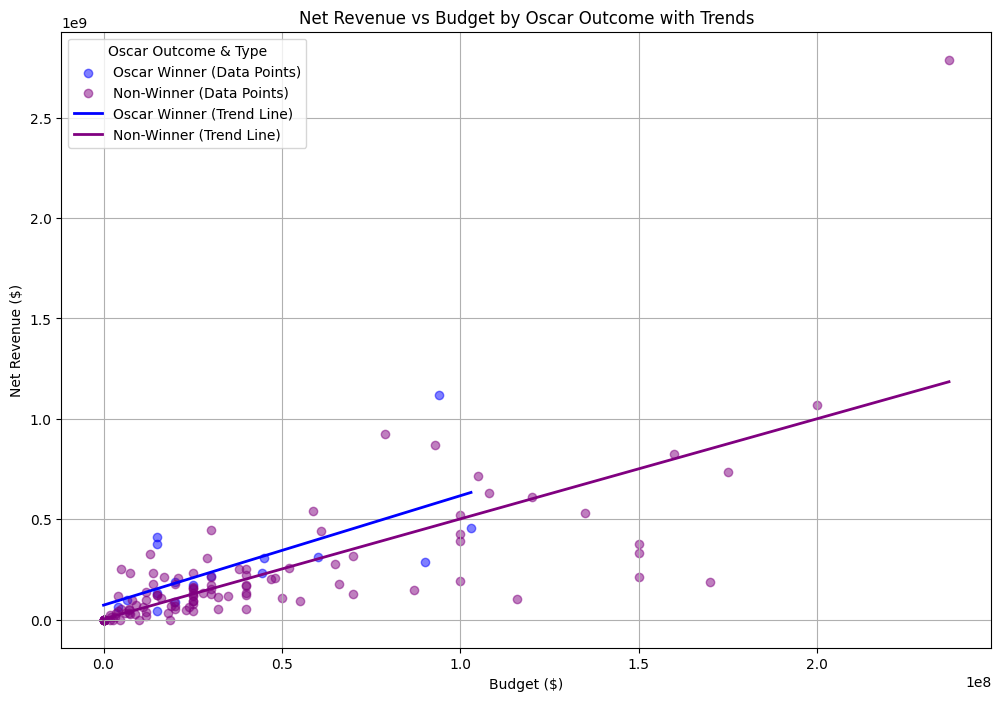

In [75]:
from sklearn.linear_model import LinearRegression

# Load the dataset
final_oscar_nominees = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Prepare the data
final_oscar_nominees_data = final_oscar_nominees[['budget', 'revenue', 'winner']].dropna(subset=['budget', 'revenue'])

# Separate the data into winners and non-winners
winners_data = final_oscar_nominees_data[final_oscar_nominees_data['winner'] == True]
non_winners_data = final_oscar_nominees_data[final_oscar_nominees_data['winner'] == False]

# Fit linear regression models for trend lines
winners_model = LinearRegression().fit(winners_data[['budget']], winners_data['revenue'])
non_winners_model = LinearRegression().fit(non_winners_data[['budget']], non_winners_data['revenue'])

# Generate predictions for the trend lines
winners_trend_x = np.linspace(winners_data['budget'].min(), winners_data['budget'].max(), 100)
winners_trend_y = winners_model.predict(winners_trend_x.reshape(-1, 1))
non_winners_trend_x = np.linspace(non_winners_data['budget'].min(), non_winners_data['budget'].max(), 100)
non_winners_trend_y = non_winners_model.predict(non_winners_trend_x.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(winners_data['budget'], winners_data['revenue'], color='blue', alpha=0.5, label='Oscar Winner (Data Points)')
plt.scatter(non_winners_data['budget'], non_winners_data['revenue'], color='purple', alpha=0.5, label='Non-Winner (Data Points)')
plt.plot(winners_trend_x, winners_trend_y, color='blue', linewidth=2, label='Oscar Winner (Trend Line)')
plt.plot(non_winners_trend_x, non_winners_trend_y, color='purple', linewidth=2, label='Non-Winner (Trend Line)')
plt.title('Net Revenue vs Budget by Oscar Outcome with Trends')
plt.xlabel('Budget ($)')
plt.ylabel('Net Revenue ($)')
plt.legend(title="Oscar Outcome & Type")
plt.grid(True)
plt.show()